In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [3]:
ds_p = xr.open_mfdataset("../era5/era5-nordics-precipitation_ymon.nc")

In [4]:
ds_p

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-31T23:00:00 2018-02-28T23:00:00 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
Data variables:
    tp         (time, latitude, longitude) float32 dask.array<shape=(12, 73, 111), chunksize=(12, 73, 111)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Thu Nov 22 09:55:43 2018: cdo -b 32 ymonsum -select,name=tp...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

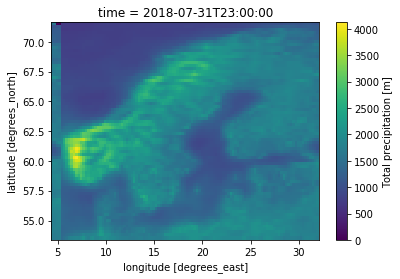

In [232]:
ds_p.tp[6].plot()

In [6]:
ds_t_avg = xr.open_mfdataset("../era5/era5-nordics-t2m_ymon.nc")
ds_t_std = xr.open_mfdataset("../era5/era5-nordics-t2m_ymonstd.nc")

In [14]:
ds_t_avg

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-31T23:00:00 2018-02-28T23:00:00 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<shape=(12, 73, 111), chunksize=(12, 73, 111)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Tue Nov 20 22:18:25 2018: cdo -b 32 ymonmean -addc,-273.15 ...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [131]:
lons, lats = np.meshgrid(ds_p.longitude, ds_p.latitude)

In [132]:
lons

array([[ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       ...,
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ],
       [ 4.5 ,  4.75,  5.  , ..., 31.5 , 31.75, 32.  ]], dtype=float32)

In [9]:
psr = xr.open_dataset("pine_spruce.nc")

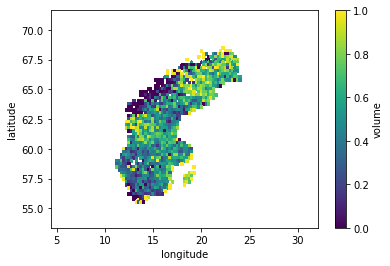

In [10]:
psr.volume.plot()

In [11]:
df = pd.DataFrame()

In [12]:
data = {
    "ratio": psr.volume.values.ravel()
}

In [13]:
data.keys()

dict_keys(['ratio'])

In [200]:
for m in range(0, 12):
    data["p%02d" % (m + 1)] = ds_p.tp[m].values.ravel()
    data["tavg%02d" % (m + 1)] = ds_t_avg.t2m[m].values.ravel()
    data["tstd%02d" % (m + 1)] = ds_t_std.t2m[m].values.ravel()
    #data["lat"] = lats.ravel()
    #data["lon"] = lons.ravel()

In [201]:
df = pd.DataFrame(data)

In [202]:
df.dropna(inplace=True)

In [203]:
df = df[df["ratio"] > 0]

In [204]:
df.columns[1:]

Index(['p01', 'tavg01', 'tstd01', 'p02', 'tavg02', 'tstd02', 'p03', 'tavg03',
       'tstd03', 'p04', 'tavg04', 'tstd04', 'p05', 'tavg05', 'tstd05', 'p06',
       'tavg06', 'tstd06', 'p07', 'tavg07', 'tstd07', 'p08', 'tavg08',
       'tstd08', 'p09', 'tavg09', 'tstd09', 'p10', 'tavg10', 'tstd10', 'p11',
       'tavg11', 'tstd11', 'p12', 'tavg12', 'tstd12', 'lat', 'lon'],
      dtype='object')

In [233]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [242]:
X_train

,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,p04,...,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12,lat,lon
2613,2841.042969,-10.388478,7.557813,719.565857,-9.617783,7.833101,663.452515,-5.161417,6.404977,788.112366,...,1.240165,4.748683,1014.720947,-4.523059,5.828666,939.135681,-8.078397,7.304939,65.75,19.50
3494,2893.817383,-7.991909,6.687978,658.695374,-7.532806,7.018993,627.424805,-3.604777,5.821207,761.040588,...,2.436266,4.374897,988.674255,-2.297191,4.913471,957.471497,-5.979119,6.505057,63.75,17.75
2273,3278.997803,-11.469535,7.476870,1144.126465,-10.654109,7.491045,1065.958252,-7.016947,6.459410,1021.220154,...,0.894407,4.188618,1397.860107,-5.519550,5.882745,1440.207642,-8.973886,7.226377,66.50,17.75
5049,2785.325684,-2.618880,5.066350,650.930847,-2.606457,5.030917,567.836426,0.176288,5.202811,663.222717,...,6.565503,4.294795,970.757263,2.710538,3.972334,820.607300,-0.590517,5.035393,60.25,18.00
4916,3277.944092,-5.650849,6.644724,973.805115,-4.925607,5.778079,836.764954,-1.300059,5.603540,1116.601196,...,4.267279,4.549209,1489.568481,0.058381,4.692800,1070.990112,-4.196858,6.699536,60.50,12.50
3286,2999.731445,-4.487235,5.222780,785.772461,-6.079182,5.834244,688.017639,-3.865053,4.614856,797.331116,...,5.560833,3.070514,1082.451904,1.500665,3.387971,1102.541016,-1.563205,4.425249,64.25,21.25
5374,3073.004639,-2.621937,5.668977,816.197083,-2.474729,5.272104,698.981995,0.585332,5.334888,840.392090,...,6.360129,4.514524,1211.173706,2.525447,4.349558,1050.712036,-0.915054,5.808310,59.50,16.00
2733,2897.093994,-8.065157,7.072434,696.041687,-8.210560,7.300220,662.853210,-4.272938,5.695934,790.304382,...,3.681248,4.249505,1034.176392,-1.591423,4.987562,997.322388,-5.246943,6.525106,65.50,21.75
2723,2862.704102,-10.109963,7.295352,720.921875,-9.439564,7.627171,670.972168,-5.098011,6.261109,792.310608,...,1.199053,4.667694,1027.250244,-4.356709,5.611454,955.432556,-7.832769,6.982722,65.50,19.25
2828,2964.980713,-9.470495,7.381667,820.152283,-8.777191,7.542365,762.953308,-4.643482,6.364886,843.750916,...,1.870529,4.396918,1079.554565,-3.570554,5.417847,1046.322998,-7.254186,7.112244,65.25,17.75


In [243]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [244]:
y_pred = rf.predict(X_test)

In [245]:
mean_squared_error(y_test, y_pred)

0.04592075988287657

In [246]:
r2_score(y_test, y_pred)

0.20732489603015347

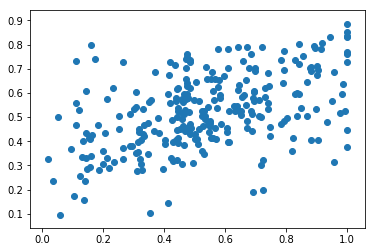

In [248]:
plt.scatter(y_test, y_pred)

In [249]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [250]:
df_results

,observed,predicted
2294,0.558532,0.687519
3707,0.904518,0.405449
3611,0.710525,0.506246
3604,0.611634,0.397568
2182,0.160218,0.796799
2400,0.984061,0.593915
6583,0.186109,0.280092
2932,0.353989,0.104946
2393,0.788891,0.639169
5370,0.445707,0.413882


In [215]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [216]:
feature_importances

,importance
lon,0.063647
p03,0.060746
p02,0.054254
p12,0.043671
p01,0.043576
p10,0.043214
tavg04,0.038736
p07,0.036570
tavg05,0.035967
p06,0.031905


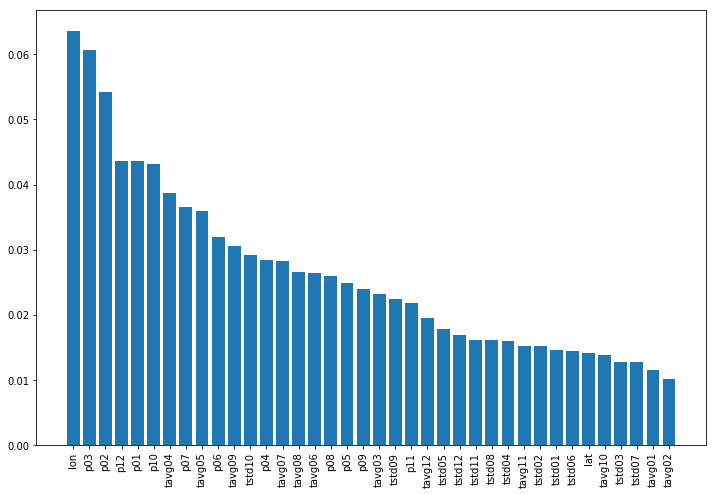

In [217]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()